# Clustering Based on Neural Networks in Wireless Sensor Networks

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import euclidean

---
## Using Cluster Blobs and Clustering with KMeans


In [27]:
df = pd.read_csv("../Dataset/blobs_dataset.csv")
df.head()

,x,y
0,-2.143722,4.128762
1,-2.459323,4.161950
2,-6.374448,-8.003754
3,-10.310702,-3.096193
4,-6.656838,-3.227972


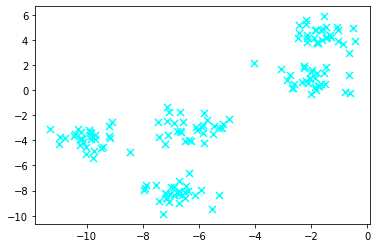

[0 0 2 1 3 2 0 0 4 3 4 3 4 1 4 3 4 3 4 2 1 3 1 3 2 3 1 1 2 1 0 0 2 1 4 1 2
 2 4 4 2 3 0 4 0 1 3 2 2 1 0 4 0 0 1 2 1 2 3 0 3 3 4 1 4 2 2 2 4 1 0 3 0 4
 3 3 1 2 0 0 3 2 1 1 2 0 3 2 4 3 2 4 4 4 4 4 2 2 0 3 1 4 3 1 0 1 0 1 0 2 4
 3 0 3 4 3 0 0 1 1 2 3 4 4 1 2 3 1 4 4 3 0 2 2 2 1 0 0 2 4 1 1 4 1 0 0 0 3
 3 3]


In [28]:
#sample wsn points
X,y = make_blobs(
    n_samples=150 ,n_features=2,
    centers=5,cluster_std=0.7,
    shuffle=True, random_state=1
)
# np.savetxt("../Dataset/blobs_dataset.csv",X,delimiter=",")
#plot of sample wsn points

plt.scatter(
    X[:,0],X[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

plt.show()
print(y)

In [29]:
#Applying clustering assuming 3 nodes

km = KMeans(
    n_clusters=5
    ,init='random',
    n_init=10,max_iter=300,
    tol=1e-04,random_state=0
)

y_km = km.fit_predict(X)

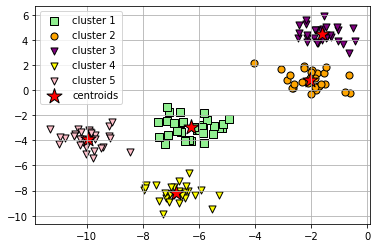

In [30]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='purple',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    X[y_km == 3, 0], X[y_km == 3, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='cluster 4'
)
plt.scatter(
    X[y_km == 4, 0], X[y_km == 4, 1],
    s=50, c='pink',
    marker='v', edgecolor='black',
    label='cluster 5'
)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Text(0, 0.5, 'Y-Value')

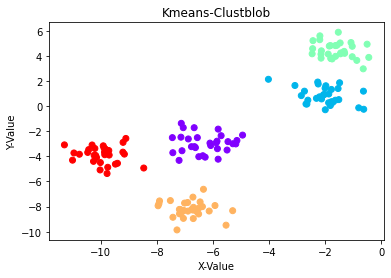

In [31]:
plt.scatter(X[:,0],X[:,1],c=y_km,cmap = 'rainbow')
plt.title("Kmeans-Clustblob")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
# plt.savefig("kmeans_blob.jpg")
# plt.legend()  

- The above plot tells us that 5 clusters are appropriate enough due to the elbow forming at 5 and the improvement becomes very less there after

## Analysing Performance (Energy)


### 1. Finding Energy with Clustering

In [32]:
# assuming base station at point B(-6,6)
B = [-6.0,6.0]
B = np.array(B)

In [33]:
# calculating distances of cluster nodes with cluster heads
km.cluster_centers_

array([[-6.28009635, -2.97780066],
       [-2.02566024,  0.83410069],
       [-1.59530399,  4.42739586],
       [-6.82766344, -8.2096359 ],
       [-9.95564539, -3.89047623]])

In [34]:
def calcdist(heads,points,y_clust):
    # print(heads)
    # print(heads[0])
    num_heads = heads.size // 2
    num_points = points.size //2
    dist = []
    for i in range(num_points):
        y_c = y_clust[i]
        head = heads[y_c]
        # print(head,y_c,points[i])
        dist.append(euclidean(points[i],head))
    return dist

In [35]:
# Calculating Distances from Cluster Heads
node_distances = []
node_distances = calcdist(km.cluster_centers_,X,y_km)
node_distances
        


[0.6244555503442799,
 0.9038748603387466,
 0.4977869402063779,
 0.8700293956957528,
 0.4522385627067006,
 0.3338181112285502,
 1.4509325753576348,
 0.7551558814423017,
 0.5490362261853203,
 1.0970040393534997,
 0.5529147844941555,
 0.9907930368846365,
 0.9159927911064301,
 0.7290479180569057,
 1.4405485801624776,
 1.6322847856834544,
 0.7855890972840839,
 0.25885639633427493,
 0.7467987052390438,
 1.8154541272917497,
 1.2508437531244496,
 0.46457623099854917,
 1.1959140640327852,
 1.4794097773467778,
 0.7554148138737788,
 1.0886263571648247,
 0.6386733188858363,
 1.5641722575665107,
 1.709450948299602,
 0.6083822845463492,
 0.46768379914312236,
 0.38861751597742494,
 0.9485299844985831,
 0.09887712485460402,
 0.9322214425204906,
 0.7757749661842788,
 0.4900152706251194,
 0.07303300302595701,
 0.81839371416617,
 0.6084026996242771,
 0.5163320572436927,
 0.47537768411135584,
 0.4429359784229449,
 1.3210579321264813,
 0.6563403523760339,
 0.2836490740306289,
 0.17776982633029018,
 0.16386

In [36]:
head_distances = []
for i in range(km.cluster_centers_.size//2):
    dist = euclidean(km.cluster_centers_[i],B)
    mult = y_km[y_km==i].size
    head_distances.append(dist*mult*0.80)

head_distances

[215.57205432548554,
 156.42752298076812,
 112.24826098127201,
 341.6092749583109,
 255.65199522546072]

In [37]:
# Finding Total Energy Required

energy = sum(head_distances)+sum(node_distances)

print("Energy with clustering =",energy)

Energy with clustering = 1203.0617369731085


### 2. Finding Energy Without Clustering


In [38]:
energy_without = 0.0

for point in X:
    energy_without+=euclidean(point,B)
print("Energy without clustering =",energy_without)

Energy without clustering = 1355.5424921882948


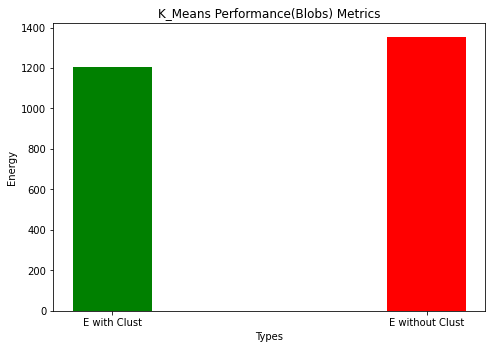

In [39]:
# Plotting the energies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ens = ['E with Clust','E without Clust']
vals = [energy,energy_without]
ax.bar(ens,vals,width=0.25,color=('green','red'))
plt.xlabel("Types")
plt.ylabel("Energy")
plt.title('K_Means Performance(Blobs) Metrics')
plt.savefig("../Performance/wsn_clust_kmeans_blobs_perf.jpg",bbox_inches = "tight")
plt.show()

In [40]:
# # Using Elbow method to determine appropriate number of clusters

# distortions = []
# for i in range(1, 11):
#     km = KMeans(
#         n_clusters=i, init='random',
#         n_init=10, max_iter=300,
#         tol=1e-04, random_state=0
#     )
#     km.fit(X)
#     distortions.append(km.inertia_)

# # plot
# plt.plot(range(1, 11), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()

In [171]:
with open('sample.txt', 'r') as file:
    data = file.read()
data

'1 41.477114 419.561668 10000.000000\n2 175.275600 452.818479 10000.000000\n3 288.945700 25.543266 10000.000000\n4 107.827037 73.342283 10000.000000\n5 208.150670 438.779146 10000.000000\n6 46.479353 464.922471 10000.000000\n7 467.918859 132.678967 10000.000000\n8 17.839435 233.233609 10000.000000\n9 292.189999 363.371397 10000.000000\n10 166.747185 31.841133 10000.000000\n11 445.818749 414.481291 10000.000000\n12 186.474791 382.731583 10000.000000\n13 218.700481 259.135857 10000.000000\n14 280.094463 122.752941 10000.000000\n15 64.152644 305.241645 10000.000000\n16 306.783853 117.465652 10000.000000\n17 428.804976 57.652337 10000.000000\n18 441.257508 194.454555 10000.000000\n19 149.911219 376.457072 10000.000000\n20 132.584751 262.774162 10000.000000\n21 114.617359 28.192776 10000.000000\n22 413.890526 57.907057 10000.000000\n23 270.961501 312.341983 10000.000000\n24 0.187911 81.807560 10000.000000\n25 4.758282 376.500727 10000.000000\n26 351.854877 178.170530 10000.000000\n27 335.20

In [172]:
x = list(map(str, data.split('\n')))

In [173]:
x.pop()

''

In [174]:
x

['1 41.477114 419.561668 10000.000000',
 '2 175.275600 452.818479 10000.000000',
 '3 288.945700 25.543266 10000.000000',
 '4 107.827037 73.342283 10000.000000',
 '5 208.150670 438.779146 10000.000000',
 '6 46.479353 464.922471 10000.000000',
 '7 467.918859 132.678967 10000.000000',
 '8 17.839435 233.233609 10000.000000',
 '9 292.189999 363.371397 10000.000000',
 '10 166.747185 31.841133 10000.000000',
 '11 445.818749 414.481291 10000.000000',
 '12 186.474791 382.731583 10000.000000',
 '13 218.700481 259.135857 10000.000000',
 '14 280.094463 122.752941 10000.000000',
 '15 64.152644 305.241645 10000.000000',
 '16 306.783853 117.465652 10000.000000',
 '17 428.804976 57.652337 10000.000000',
 '18 441.257508 194.454555 10000.000000',
 '19 149.911219 376.457072 10000.000000',
 '20 132.584751 262.774162 10000.000000',
 '21 114.617359 28.192776 10000.000000',
 '22 413.890526 57.907057 10000.000000',
 '23 270.961501 312.341983 10000.000000',
 '24 0.187911 81.807560 10000.000000',
 '25 4.758282 

In [199]:
x[0][0]

'1'

In [175]:
y=[]
num=0
for i in x:
    y.append(np.array(list(map(float,x[num].split()))))
    num+=1

In [176]:
y = np.array(y)

In [177]:
y

array([[1.00000000e+00, 4.14771140e+01, 4.19561668e+02, 1.00000000e+04],
       [2.00000000e+00, 1.75275600e+02, 4.52818479e+02, 1.00000000e+04],
       [3.00000000e+00, 2.88945700e+02, 2.55432660e+01, 1.00000000e+04],
       [4.00000000e+00, 1.07827037e+02, 7.33422830e+01, 1.00000000e+04],
       [5.00000000e+00, 2.08150670e+02, 4.38779146e+02, 1.00000000e+04],
       [6.00000000e+00, 4.64793530e+01, 4.64922471e+02, 1.00000000e+04],
       [7.00000000e+00, 4.67918859e+02, 1.32678967e+02, 1.00000000e+04],
       [8.00000000e+00, 1.78394350e+01, 2.33233609e+02, 1.00000000e+04],
       [9.00000000e+00, 2.92189999e+02, 3.63371397e+02, 1.00000000e+04],
       [1.00000000e+01, 1.66747185e+02, 3.18411330e+01, 1.00000000e+04],
       [1.10000000e+01, 4.45818749e+02, 4.14481291e+02, 1.00000000e+04],
       [1.20000000e+01, 1.86474791e+02, 3.82731583e+02, 1.00000000e+04],
       [1.30000000e+01, 2.18700481e+02, 2.59135857e+02, 1.00000000e+04],
       [1.40000000e+01, 2.80094463e+02, 1.22752941e

In [178]:
X_inputs = y[:,1:3]
y_weights = y[:,3]
print(X_inputs,y_weights)

[[4.14771140e+01 4.19561668e+02]
 [1.75275600e+02 4.52818479e+02]
 [2.88945700e+02 2.55432660e+01]
 [1.07827037e+02 7.33422830e+01]
 [2.08150670e+02 4.38779146e+02]
 [4.64793530e+01 4.64922471e+02]
 [4.67918859e+02 1.32678967e+02]
 [1.78394350e+01 2.33233609e+02]
 [2.92189999e+02 3.63371397e+02]
 [1.66747185e+02 3.18411330e+01]
 [4.45818749e+02 4.14481291e+02]
 [1.86474791e+02 3.82731583e+02]
 [2.18700481e+02 2.59135857e+02]
 [2.80094463e+02 1.22752941e+02]
 [6.41526440e+01 3.05241645e+02]
 [3.06783853e+02 1.17465652e+02]
 [4.28804976e+02 5.76523370e+01]
 [4.41257508e+02 1.94454555e+02]
 [1.49911219e+02 3.76457072e+02]
 [1.32584751e+02 2.62774162e+02]
 [1.14617359e+02 2.81927760e+01]
 [4.13890526e+02 5.79070570e+01]
 [2.70961501e+02 3.12341983e+02]
 [1.87911000e-01 8.18075600e+01]
 [4.75828200e+00 3.76500727e+02]
 [3.51854877e+02 1.78170530e+02]
 [3.35206057e+02 4.54975270e+01]
 [4.11327495e+02 2.11609987e+02]
 [5.07940940e+01 4.87946780e+01]
 [5.31786650e+01 3.09349438e+02]
 [1.004936

In [184]:
num_clust = len(x)//10
num_clust

20

In [185]:
kmw = KMeans(
    n_clusters=num_clust
    ,init='random',
    n_init=10,max_iter=300,
    tol=1e-04,random_state=0
)
y_kmw = kmw.fit_predict(X_inputs,y_weights)

In [193]:
y_kmw

array([ 8, 10, 17, 15, 10,  8, 19,  0,  9, 15, 13, 10,  4, 17,  0, 17, 14,
        6, 12,  7, 15, 14,  9,  2,  8, 18, 17,  6, 16,  0,  7, 19, 12, 12,
        9, 15,  8,  3,  5, 16,  9, 17,  5,  5, 15,  8, 15,  8, 19, 19,  3,
       16,  3,  4,  9, 12,  9, 13, 19, 11, 11,  3, 11,  7,  2,  3,  6, 18,
       13,  0, 19,  7,  4,  3,  2,  3,  0,  5,  2,  5, 13,  0,  7,  7, 16,
        3,  0,  1,  3,  3, 11,  7,  3, 10, 14,  1, 17, 17,  1, 15,  8,  2,
        0, 10, 17,  5, 10, 12, 17,  3, 11, 15, 19, 18,  5,  4, 18,  1,  7,
       17, 19,  3, 18,  7,  0,  5,  9,  6,  6,  6,  2, 18, 17,  5, 18, 18,
       14, 10,  5,  9,  2, 17, 10, 17,  7,  5,  7,  7,  6, 12, 17, 10, 19,
       12, 10,  4,  3, 10, 19,  3,  8, 18,  5,  3,  3, 11, 12, 13,  9, 19,
        2, 17, 14,  7,  1,  1, 18,  6,  8,  6,  4, 13, 14,  6, 15,  1,  2,
       14, 19, 19, 17,  8,  4, 11, 16,  8,  0, 11, 17,  9], dtype=int32)

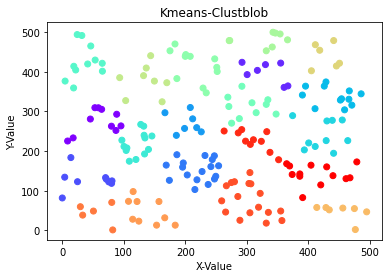

In [194]:
plt.scatter(X_inputs[:,0],X_inputs[:,1],c=y_kmw,cmap = 'rainbow')
plt.title("Kmeans-Clustblob")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.show()
# plt.savefig("kmeans_blob.jpg")
# plt.legend()  

In [214]:
with open('clusters.txt', 'w') as f:
    for i in range(len(y_kmw)):
        f.write("%d %s\n" %(y[i,0],y_kmw[i]))

In [215]:
maxen=[]
for i in range(num_clust):
    maxen.append([0.0,0.0])

In [216]:
for i in range(len(x)):
    kaunsa_cluster = y_kmw[i]
    energy = y[i,3]
    print(kaunsa_cluster,energy,maxen[kaunsa_cluster][1],y[i,0])
    if energy > maxen[kaunsa_cluster][1]:
        maxen[kaunsa_cluster]=[y[i,0],energy]

8 10000.0 0.0 1.0
10 10000.0 0.0 2.0
17 10000.0 0.0 3.0
15 10000.0 0.0 4.0
10 10000.0 10000.0 5.0
8 10000.0 10000.0 6.0
19 10000.0 0.0 7.0
0 10000.0 0.0 8.0
9 10000.0 0.0 9.0
15 10000.0 10000.0 10.0
13 10000.0 0.0 11.0
10 10000.0 10000.0 12.0
4 10000.0 0.0 13.0
17 10000.0 10000.0 14.0
0 10000.0 10000.0 15.0
17 10000.0 10000.0 16.0
14 10000.0 0.0 17.0
6 10000.0 0.0 18.0
12 10000.0 0.0 19.0
7 10000.0 0.0 20.0
15 10000.0 10000.0 21.0
14 10000.0 10000.0 22.0
9 10000.0 10000.0 23.0
2 10000.0 0.0 24.0
8 10000.0 10000.0 25.0
18 10000.0 0.0 26.0
17 10000.0 10000.0 27.0
6 10000.0 10000.0 28.0
16 10000.0 0.0 29.0
0 10000.0 10000.0 30.0
7 10000.0 10000.0 31.0
19 10000.0 10000.0 32.0
12 10000.0 10000.0 33.0
12 10000.0 10000.0 34.0
9 10000.0 10000.0 35.0
15 10000.0 10000.0 36.0
8 10000.0 10000.0 37.0
3 10000.0 0.0 38.0
5 10000.0 0.0 39.0
16 10000.0 10000.0 40.0
9 10000.0 10000.0 41.0
17 10000.0 10000.0 42.0
5 10000.0 10000.0 43.0
5 10000.0 10000.0 44.0
15 10000.0 10000.0 45.0
8 10000.0 10000.0 46.0

In [217]:
maxen

[[8.0, 10000.0],
 [88.0, 10000.0],
 [24.0, 10000.0],
 [38.0, 10000.0],
 [13.0, 10000.0],
 [39.0, 10000.0],
 [18.0, 10000.0],
 [20.0, 10000.0],
 [1.0, 10000.0],
 [9.0, 10000.0],
 [2.0, 10000.0],
 [60.0, 10000.0],
 [19.0, 10000.0],
 [11.0, 10000.0],
 [17.0, 10000.0],
 [4.0, 10000.0],
 [29.0, 10000.0],
 [3.0, 10000.0],
 [26.0, 10000.0],
 [7.0, 10000.0]]

In [232]:
with open('oldleachdead.txt', 'r') as file:
    dataold = file.read()
dataold

'1 0\n2 0\n3 1\n4 1\n5 1\n6 1\n7 1\n8 1\n9 1\n10 1\n11 1\n12 5\n13 9\n14 14\n15 19\n16 23\n17 27\n18 32\n19 38\n20 42\n21 46\n22 51\n23 57\n24 58\n25 66\n26 72\n27 77\n28 85\n29 87\n30 94\n31 98\n32 101\n33 101\n34 103\n35 108\n36 110\n37 111\n38 114\n39 118\n40 120\n41 123\n42 123\n43 125\n44 126\n45 128\n46 129\n47 130\n48 132\n49 134\n50 134\n51 136\n'

In [235]:
with open('newleachdead.txt', 'r') as file:
    datanew = file.read()
datanew

'1 0\n2 0\n3 1\n4 1\n5 1\n6 1\n7 1\n8 1\n9 1\n10 1\n11 1\n12 5\n13 9\n14 14\n15 19\n16 23\n17 27\n18 32\n19 38\n20 42\n21 46\n22 51\n23 57\n24 58\n25 66\n26 72\n27 77\n28 85\n29 87\n30 94\n31 98\n32 101\n33 101\n34 103\n35 108\n36 110\n37 111\n38 114\n39 118\n40 120\n41 123\n42 123\n43 125\n44 126\n45 128\n46 129\n47 130\n48 132\n49 134\n50 134\n51 136\n'

In [239]:
x_old = list(map(str, dataold.split('\n')))
x_new = list(map(str, datanew.split('\n')))

In [240]:
x_old,x_new

(['1 0',
  '2 0',
  '3 1',
  '4 1',
  '5 1',
  '6 1',
  '7 1',
  '8 1',
  '9 1',
  '10 1',
  '11 1',
  '12 5',
  '13 9',
  '14 14',
  '15 19',
  '16 23',
  '17 27',
  '18 32',
  '19 38',
  '20 42',
  '21 46',
  '22 51',
  '23 57',
  '24 58',
  '25 66',
  '26 72',
  '27 77',
  '28 85',
  '29 87',
  '30 94',
  '31 98',
  '32 101',
  '33 101',
  '34 103',
  '35 108',
  '36 110',
  '37 111',
  '38 114',
  '39 118',
  '40 120',
  '41 123',
  '42 123',
  '43 125',
  '44 126',
  '45 128',
  '46 129',
  '47 130',
  '48 132',
  '49 134',
  '50 134',
  '51 136',
  ''],
 ['1 0',
  '2 0',
  '3 1',
  '4 1',
  '5 1',
  '6 1',
  '7 1',
  '8 1',
  '9 1',
  '10 1',
  '11 1',
  '12 5',
  '13 9',
  '14 14',
  '15 19',
  '16 23',
  '17 27',
  '18 32',
  '19 38',
  '20 42',
  '21 46',
  '22 51',
  '23 57',
  '24 58',
  '25 66',
  '26 72',
  '27 77',
  '28 85',
  '29 87',
  '30 94',
  '31 98',
  '32 101',
  '33 101',
  '34 103',
  '35 108',
  '36 110',
  '37 111',
  '38 114',
  '39 118',
  '40 120',
  '41 1

In [241]:
x_old.pop()
x_new.pop()

''

In [242]:
y_old = []
num = 0
for i in x_old:
    y_old.append(np.array(list(map(int, x_old[num].split()))))
    num += 1

y_old = np.array(y_old)

In [244]:
y_new = []
num = 0
for i in x_new:
    y_new.append(np.array(list(map(int, x_new[num].split()))))
    num += 1

y_new = np.array(y_new)

In [245]:
y_new

array([[  1,   0],
       [  2,   0],
       [  3,   1],
       [  4,   1],
       [  5,   1],
       [  6,   1],
       [  7,   1],
       [  8,   1],
       [  9,   1],
       [ 10,   1],
       [ 11,   1],
       [ 12,   5],
       [ 13,   9],
       [ 14,  14],
       [ 15,  19],
       [ 16,  23],
       [ 17,  27],
       [ 18,  32],
       [ 19,  38],
       [ 20,  42],
       [ 21,  46],
       [ 22,  51],
       [ 23,  57],
       [ 24,  58],
       [ 25,  66],
       [ 26,  72],
       [ 27,  77],
       [ 28,  85],
       [ 29,  87],
       [ 30,  94],
       [ 31,  98],
       [ 32, 101],
       [ 33, 101],
       [ 34, 103],
       [ 35, 108],
       [ 36, 110],
       [ 37, 111],
       [ 38, 114],
       [ 39, 118],
       [ 40, 120],
       [ 41, 123],
       [ 42, 123],
       [ 43, 125],
       [ 44, 126],
       [ 45, 128],
       [ 46, 129],
       [ 47, 130],
       [ 48, 132],
       [ 49, 134],
       [ 50, 134],
       [ 51, 136]])

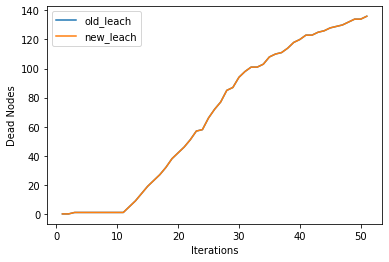

In [249]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0,10,1000)


plt.plot(y_old[:,0], y_old[:,1],label = "old_leach")
plt.plot(y_new[:,0], y_new[:,1],label="new_leach")
plt.xlabel("Iterations")
plt.ylabel("Dead Nodes")
plt.legend()



In [304]:
def plotfile(file1, file2, xname, yname,types):
    with open(file1, 'r') as file:
        dataold = file.read()

    with open(file2, 'r') as file:
        datanew = file.read()

    x_old = list(map(str, dataold.split('\n')))
    x_new = list(map(str, datanew.split('\n')))

    x_old.pop()
    x_new.pop()

    y_old = []
    num = 0
    for i in x_old:
        y_old.append(np.array(list(map(types, x_old[num].split()))))
        num += 1

    y_old = np.array(y_old)

    y_new = []
    num = 0
    for i in x_new:
        y_new.append(np.array(list(map(types, x_new[num].split()))))
        num += 1

    y_new = np.array(y_new)

    fig = plt.figure(figsize=(20,10))
    ax = plt.axes()

    x = np.linspace(0, 10, 1000)

    plt.plot(y_old[:, 0], y_old[:, 1], label="old_leach")
    plt.plot(y_new[:, 0], y_new[:, 1], label="new_leach")
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()
    plt.savefig("../Plots/"+yname+".jpg",bbox_inches = "tight")
    plt.show()


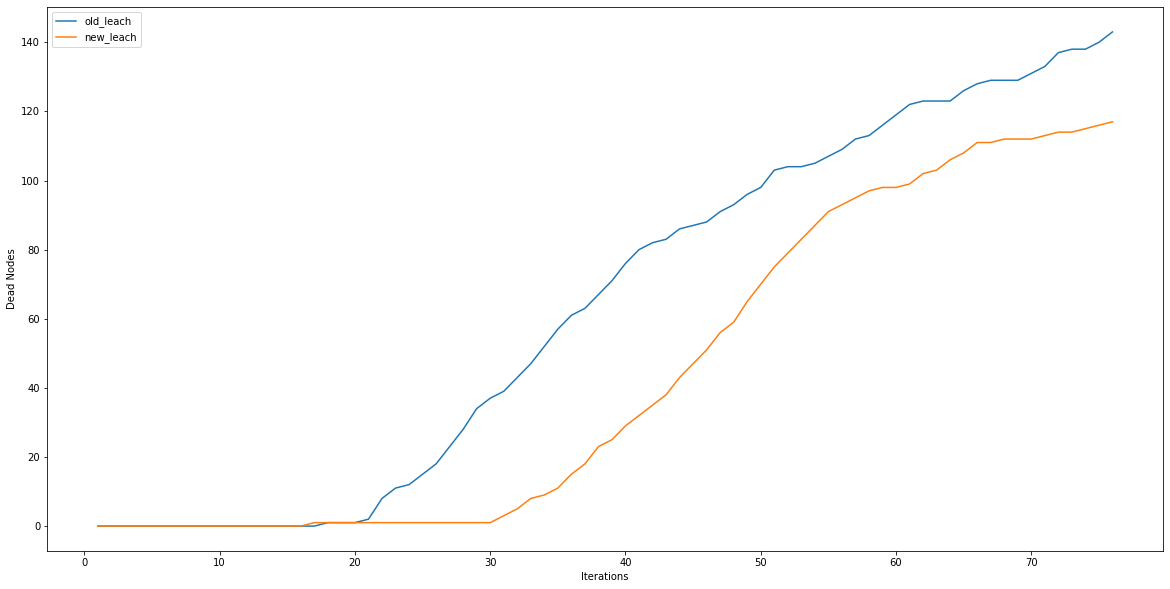

In [305]:
plotfile('old_deadgraph.txt','new_deadgraph.txt','Iterations','Dead Nodes',int)

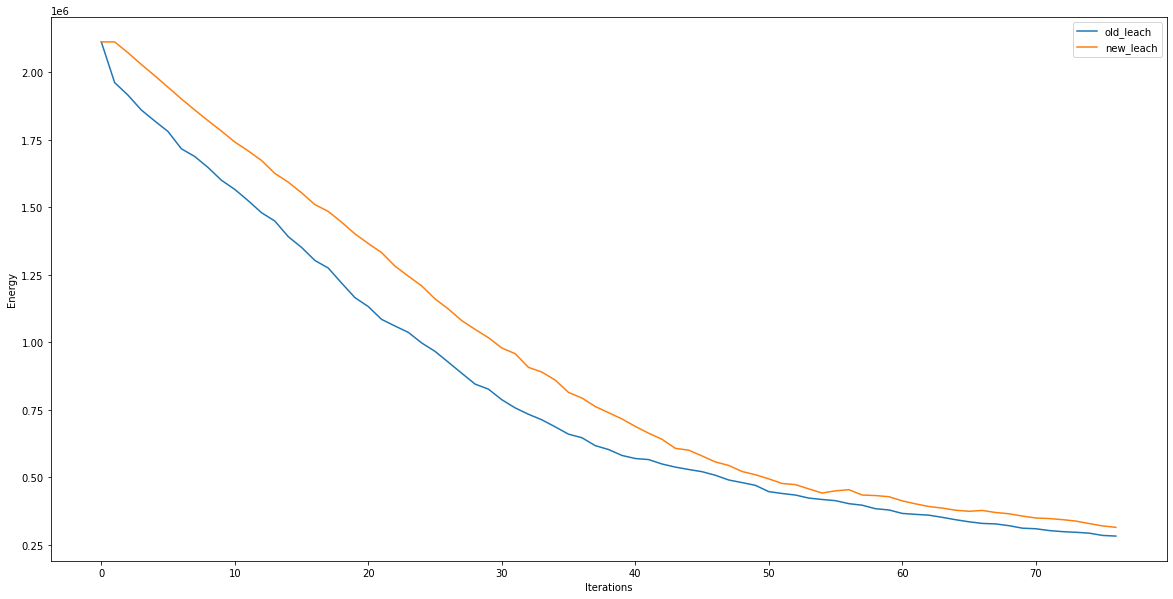

In [306]:
plotfile('old_sumenergy.txt','new_sumenergy.txt','Iterations','Energy',float)